In [1]:
run zipfify.py

/usr/local/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


calculating msnbc...
calculating fox...


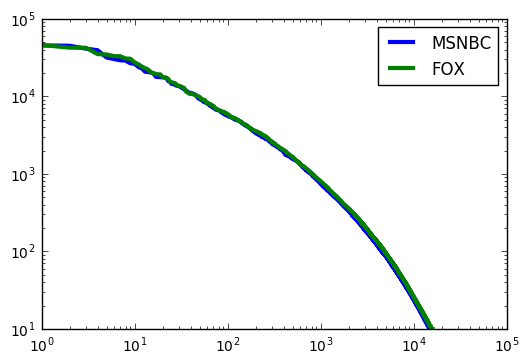

In [2]:
plt.show()

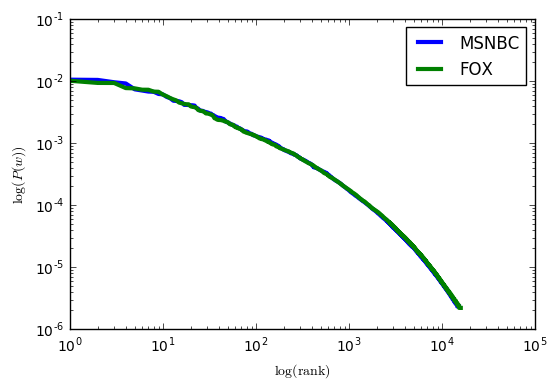

In [7]:
y_m = [a[1] for a in msnbc_counts]
y_f = [a[1] for a in fox_counts]

y_m = np.array(y_m)/sum(y_m)
y_f = np.array(y_f)/sum(y_f)

plt.loglog(y_m, lw=3, label='MSNBC')
plt.loglog(y_f, lw=3, label='FOX')
plt.xlabel('$\log(\mathrm{rank})$')
plt.ylabel('$\log(P(w))$')
plt.legend()
plt.show()

In [8]:
[c['name'] for c in iatv_corpus.find()]

['Sample Corpus',
 '2012 Debate Cycle -- October 1 to October 31',
 'dump',
 'Viomet 2012 -- September, October, November',
 'Viomet 2012 -- September, October, November',
 'Sample Week for Zipf experiment',
 'Three Months for Semantic Network Experiments']

calculating msnbc...
calculating fox...


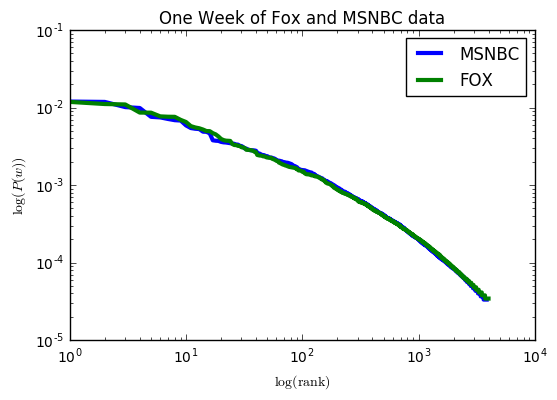

In [11]:
zipf = iatv_corpus.find_one(
    {'name': 'Sample Week for Zipf experiment'}
)

docs = [iatv_docs.find_one({'_id': doc_id}) for doc_id in zipf['documents']]

msnbc_docs = [doc for doc in docs if doc['network'] == 'MSNBCW']
fox_docs = [doc for doc in docs if doc['network'] == 'FOXNEWSW']

print('calculating msnbc...')
msnbc_texts, msnbc_counts = calculate_counts(msnbc_docs)
msnbc_counts = list(msnbc_counts.items())

print('calculating fox...')
fox_texts, fox_counts = calculate_counts(fox_docs)
fox_counts = list(fox_counts.items())

msnbc_counts.sort(key=lambda x: -x[1])
fox_counts.sort(key=lambda x: -x[1])

y_m = [a[1] for a in msnbc_counts]
y_f = [a[1] for a in fox_counts]

y_m = np.array(y_m)/sum(y_m)
y_f = np.array(y_f)/sum(y_f)

plt.loglog(y_m, lw=3, label='MSNBC')
plt.loglog(y_f, lw=3, label='FOX')
plt.xlabel('$\log(\mathrm{rank})$')
plt.ylabel('$\log(P(w))$')
plt.legend()
plt.title('One Week of Fox and MSNBC data')
plt.show()